In [5]:
from google.colab import files
uploaded = files.upload()

Saving housePrice (1).xlsx to housePrice (1).xlsx


In [14]:
pip install pandas

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [16]:
import pandas as pd

# Load the Excel file containing house price data into a DataFrame
df = pd.read_excel('housePrice (1).xlsx')

# Print the dimensions (rows and columns) of the dataset
print("Dataset dimensions:", df.shape)

# Print a sample of the data (first few rows)
print("\nSample of the data:")
df.head()


Dataset dimensions: (3479, 8)

Sample of the data:


,Area,Room,Parking,Warehouse,Elevator,Address,Price,PriceUSD
0,63,1,True,True,True,Shahran,1850000000,61666.67
1,60,1,True,True,True,Shahran,1850000000,61666.67
2,79,2,True,True,True,Pardis,550000000,18333.33
3,95,2,True,True,True,Shahrake Qods,902500000,30083.33
4,123,2,True,True,True,Shahrake Gharb,7000000000,233333.33


In [17]:
# Convert boolean columns to numeric
bool_columns = ['Parking', 'Warehouse', 'Elevator']
for col in bool_columns:
    df[col] = df[col].astype(int)

# Encode the address column
le = LabelEncoder()
df['Address_Encoded'] = le.fit_transform(df['Address'])

# Prepare features and target
features = ['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address_Encoded']
X = df[features]
y = df['PriceUSD']  # Use the USD price as the target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (2783, 6)
Test set shape: (696, 6)


In [18]:
# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Prediction
y_pred = rf_model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): ${rmse:,.2f}")
print(f"R-squared (R²): {r2:.4f}")

Root Mean Squared Error (RMSE): $145,232.18
R-squared (R²): 0.6082


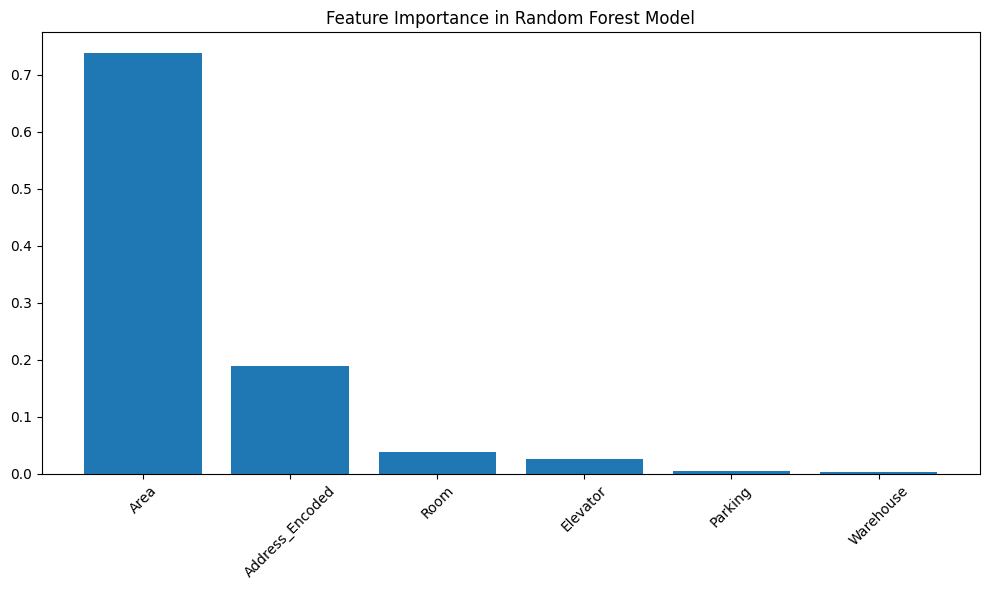


Feature Importances:
           Feature  Importance
0             Area    0.737743
5  Address_Encoded    0.188669
1             Room    0.039208
4         Elevator    0.026664
2          Parking    0.004710
3        Warehouse    0.003005


In [19]:
# Feature importance analysis
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(feature_importance['Feature'], feature_importance['Importance'])
plt.title('Feature Importance in Random Forest Model')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nFeature Importances:")
print(feature_importance)


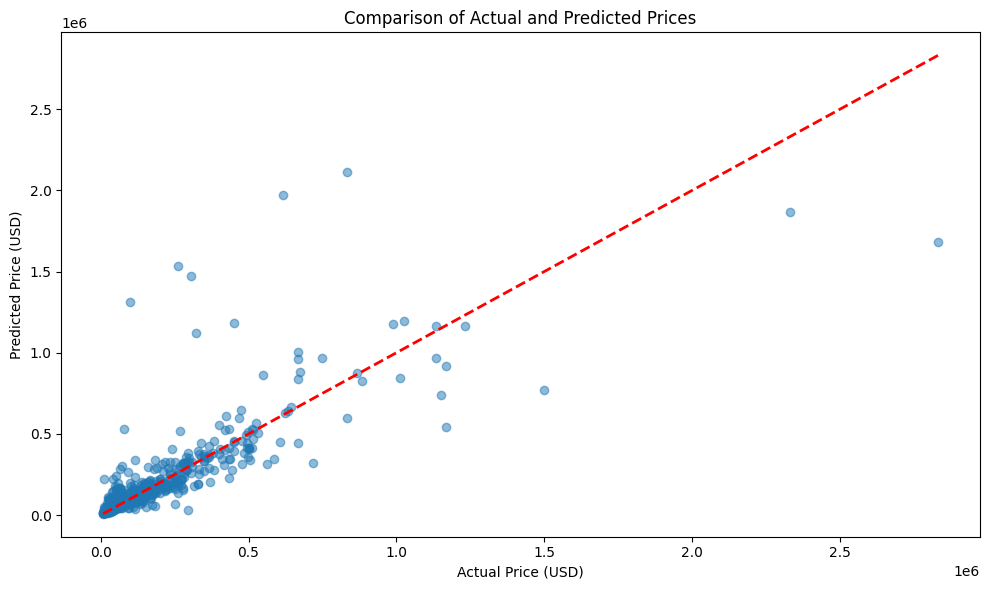

In [20]:
# Display comparison of actual and predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price (USD)')
plt.ylabel('Predicted Price (USD)')
plt.title('Comparison of Actual and Predicted Prices')
plt.tight_layout()
plt.show()


Performance Comparison of Two Models:
                           Metric Linear Regression Random Forest
0  RMSE (Root Mean Squared Error)       $188,081.41   $145,232.18
1                  R² (R-squared)            0.3430        0.6082


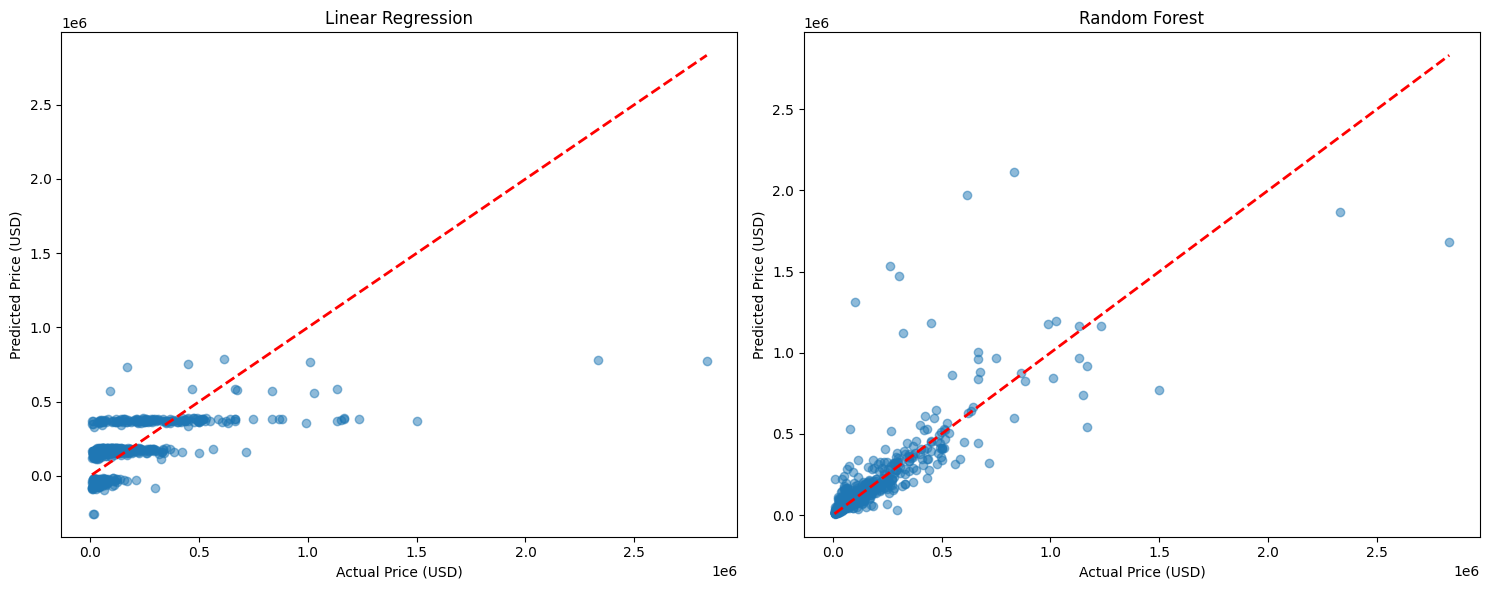


Descriptive Statistics of Errors (in USD):
       Linear Regression Error  Random Forest Error
count             6.960000e+02         6.960000e+02
mean              1.239169e+05         5.163844e+04
std               1.415911e+05         1.358395e+05
min               3.058578e+02         4.305667e+01
25%               6.680006e+04         5.392658e+03
50%               9.827742e+04         1.558614e+04
75%               1.326463e+05         4.351284e+04
max               2.061042e+06         1.355194e+06


In [21]:
# Comparison of Linear Regression and Random Forest models
from sklearn.linear_model import LinearRegression

# Create and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions with both models
lr_pred = lr_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

# Calculate evaluation metrics for both models
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))

lr_r2 = r2_score(y_test, lr_pred)
rf_r2 = r2_score(y_test, rf_pred)

# Display comparison results
comparison_df = pd.DataFrame({
    'Metric': ['RMSE (Root Mean Squared Error)', 'R² (R-squared)'],
    'Linear Regression': [f'${lr_rmse:,.2f}', f'{lr_r2:.4f}'],
    'Random Forest': [f'${rf_rmse:,.2f}', f'{rf_r2:.4f}']
})

print("Performance Comparison of Two Models:")
print(comparison_df)

# Comparative prediction plots
plt.figure(figsize=(15, 6))

# Linear Regression plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, lr_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price (USD)')
plt.ylabel('Predicted Price (USD)')
plt.title('Linear Regression')

# Random Forest plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, rf_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price (USD)')
plt.ylabel('Predicted Price (USD)')
plt.title('Random Forest')

plt.tight_layout()
plt.show()

# Compare prediction errors
errors_df = pd.DataFrame({
    'Linear Regression Error': np.abs(y_test - lr_pred),
    'Random Forest Error': np.abs(y_test - rf_pred)
})

print("\nDescriptive Statistics of Errors (in USD):")
print(errors_df.describe())


In [22]:

from sklearn.linear_model import Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor

# ------------------------
# Ridge Regression
# ------------------------
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)

ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))
ridge_r2 = r2_score(y_test, ridge_pred)

# ------------------------
# Lasso Regression
# ------------------------
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)

lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))
lasso_r2 = r2_score(y_test, lasso_pred)

# ------------------------
# K-Nearest Neighbors Regression
# ------------------------
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

knn_rmse = np.sqrt(mean_squared_error(y_test, knn_pred))
knn_r2 = r2_score(y_test, knn_pred)

# ------------------------
# Comparison Table
# ------------------------
comparison_df = pd.DataFrame({
    'Metric': ['RMSE (Root Mean Squared Error)', 'R² (R-squared)'],
    'Linear Regression': [f'${lr_rmse:,.2f}', f'{lr_r2:.4f}'],
    'Random Forest': [f'${rf_rmse:,.2f}', f'{rf_r2:.4f}'],
    'Ridge Regression': [f'${ridge_rmse:,.2f}', f'{ridge_r2:.4f}'],
    'Lasso Regression': [f'${lasso_rmse:,.2f}', f'{lasso_r2:.4f}'],
    'KNN Regression': [f'${knn_rmse:,.2f}', f'{knn_r2:.4f}']
})

print("Model Performance Comparison:")
print(comparison_df)


Model Performance Comparison:
                           Metric Linear Regression Random Forest  \
0  RMSE (Root Mean Squared Error)       $188,081.41   $145,232.18   
1                  R² (R-squared)            0.3430        0.6082   

  Ridge Regression Lasso Regression KNN Regression  
0      $188,074.43      $188,081.39    $157,133.79  
1           0.3430           0.3430         0.5414  


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=3.75828e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Updated Model Performance Comparison (with Normalization):
                           Metric Linear Regression Random Forest  \
0  RMSE (Root Mean Squared Error)       $188,081.41   $145,232.18   
1                  R² (R-squared)            0.3430        0.6082   

  Ridge Regression Lasso Regression KNN Regression  
0      $188,077.37      $188,081.40    $140,275.41  
1           0.3430           0.3430         0.6345  


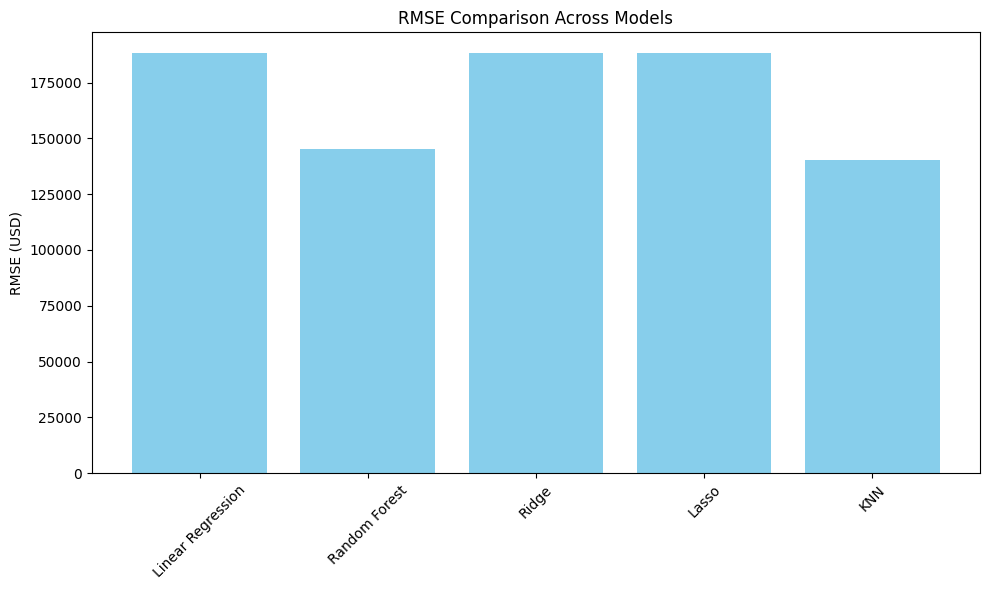

In [23]:

from sklearn.preprocessing import StandardScaler

# ------------------------
# Data Normalization (for KNN, Ridge, Lasso)
# ------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Re-train models on scaled data
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)
ridge_pred = ridge_model.predict(X_test_scaled)

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_scaled, y_train)
lasso_pred = lasso_model.predict(X_test_scaled)

knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
knn_pred = knn_model.predict(X_test_scaled)

# Re-calculate metrics
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))
ridge_r2 = r2_score(y_test, ridge_pred)

lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))
lasso_r2 = r2_score(y_test, lasso_pred)

knn_rmse = np.sqrt(mean_squared_error(y_test, knn_pred))
knn_r2 = r2_score(y_test, knn_pred)

# ------------------------
# Updated Comparison Table
# ------------------------
comparison_df = pd.DataFrame({
    'Metric': ['RMSE (Root Mean Squared Error)', 'R² (R-squared)'],
    'Linear Regression': [f'${lr_rmse:,.2f}', f'{lr_r2:.4f}'],
    'Random Forest': [f'${rf_rmse:,.2f}', f'{rf_r2:.4f}'],
    'Ridge Regression': [f'${ridge_rmse:,.2f}', f'{ridge_r2:.4f}'],
    'Lasso Regression': [f'${lasso_rmse:,.2f}', f'{lasso_r2:.4f}'],
    'KNN Regression': [f'${knn_rmse:,.2f}', f'{knn_r2:.4f}']
})

print("Updated Model Performance Comparison (with Normalization):")
print(comparison_df)

# ------------------------
# Bar Plot of RMSE for All Models
# ------------------------
rmse_values = [
    lr_rmse, rf_rmse, ridge_rmse, lasso_rmse, knn_rmse
]
model_names = [
    'Linear Regression', 'Random Forest',
    'Ridge', 'Lasso', 'KNN'
]

plt.figure(figsize=(10, 6))
plt.bar(model_names, rmse_values, color='skyblue')
plt.ylabel('RMSE (USD)')
plt.title('RMSE Comparison Across Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
